# 深層学習day4

# 強化学習

### 強化学習
* 長期的に報酬を最大化できるように環境のなかで行動を選択できるエージェントを作ることを目標とする機械学習の一分野
* 行動の結果として与えられる利益(報酬)をもとに、行動を決定する原理を改善していく仕組み
* 強化学習では、優れた方策を見つけることが目標
___

### 強化学習イメージ
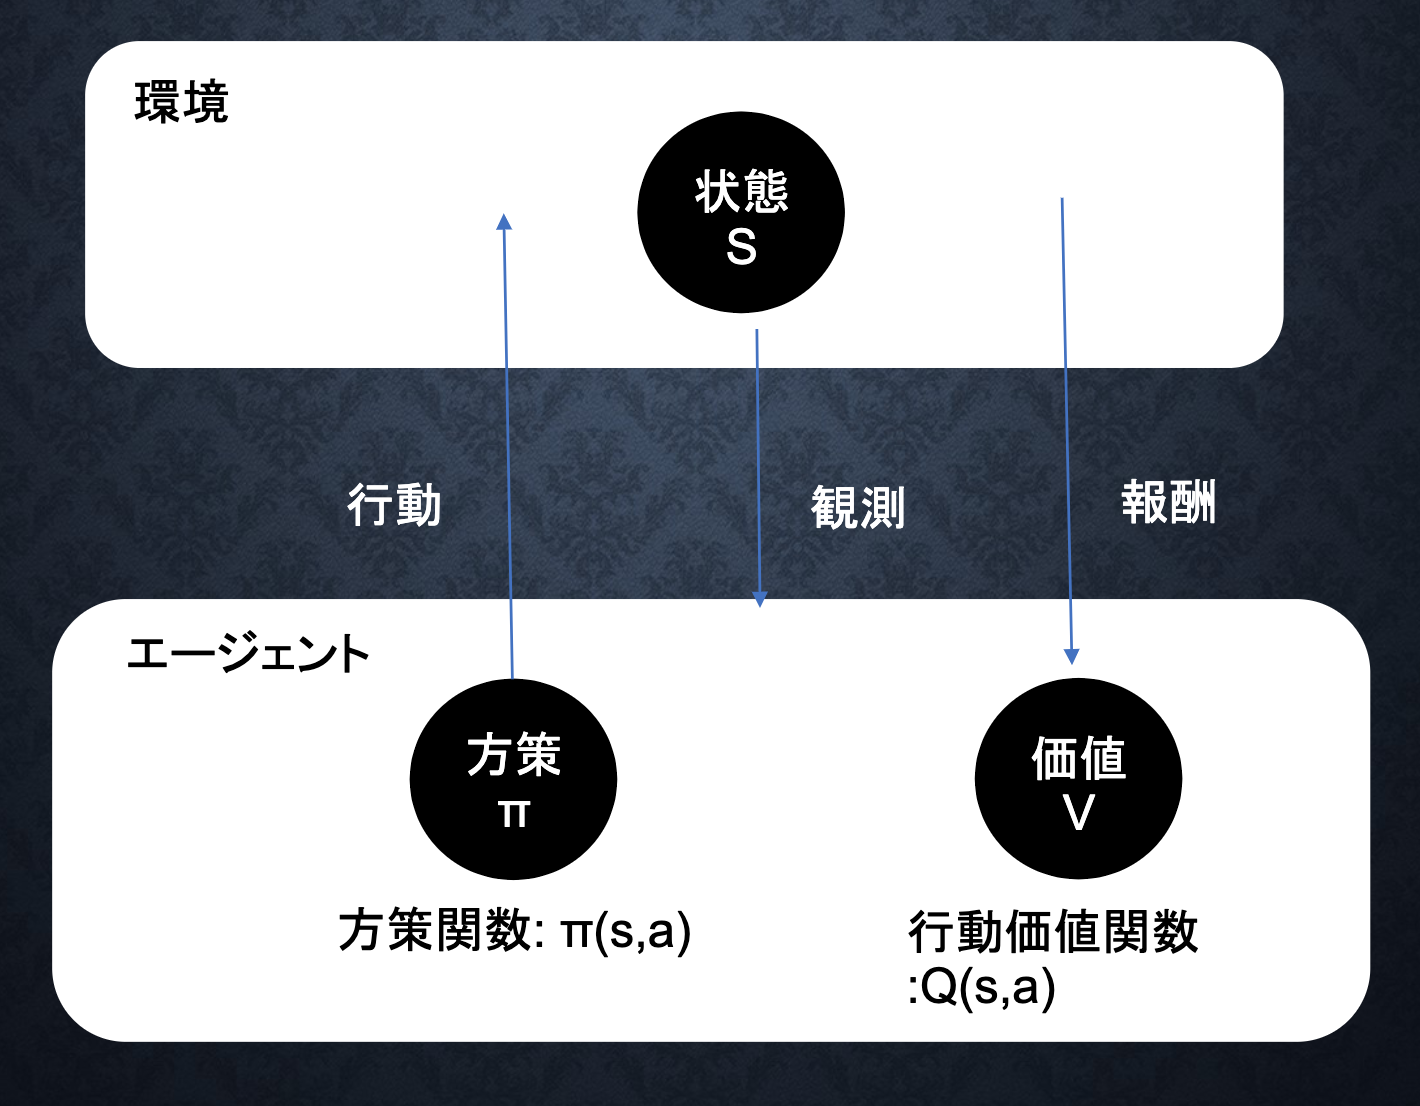
* マーケティングを例とするならば...
* 環境...会社の販売促進部
* エージェント...プロフィールと購入履歴に基づいて、キャンペーンメールを送る顧客を決めるソフトウェア
* 行動...顧客ごとに送信、非送信のふたつの行動を選ぶ
* 報酬...キャンペーンのコストという負の報酬とキャンペーンで生み出されると推測される売上という正の報酬を受ける
___

### 探索と利用のトレードオフ
* 環境について事前に完璧な知識があれば、最適な行動を予測し決定することは可能
* 強化学習の場合、上記仮定は成り立たないとする。不完全な知識を元に行動しながら、データを収集。最適な行動を見つけていく
___

### 探索と利用のトレードオフ2
* 過去のデータで、ベストとされる行動のみを常に取り続ければ他にもっとベストな行動を見つけることはできない(探索が足りない)
* 未知の行動のみを常に取り続ければ、過去の経験が活かせない(利用が足りない)
* 上記二つがトレードオフ
___

### 強化学習の歴史
* 計算速度の進展により大規模な状態をもつ場合の、強化学習を可能としつつある
* 関数近似法と、Q学習を組み合わせる手法の登場
* **Q学習**...行動価値関数を、行動する毎に更新することにより学習を進める方法
* **関数近似法**...価値関数や方策関数を関数近似する手法
___

### 価値関数
$$
V^\pi(s)\\
Q^\pi(s,a)
$$
* 価値を表す関数としては、状態価値関数と行動価値関数の2種類がある
* ある状態の価値に注目する場合は、状態価値関数
* 状態と価値を組み合わせた価値に注目する場合は、行動価値関数
___

### 方策関数
* 方策ベースの強化学習手法において、ある状態でどのような行動を採るのかの確率を与える関数
___

### 方策勾配法
$$\theta^{(t+1)}=\theta^{(t)}+\epsilon\nabla J(\theta)$$
* 方策反復法...方策をモデル化して最適化する手法
* 上式の$J$...方策の良さ(定義する必要がある)
* 最大値問題を解くので、加算の式
___

### 方策勾配定理
$$  
\nabla_{\theta} J( \theta )
=\mathbb{E}_{\pi _{\theta}}[(\nabla _{\theta} \log{\pi _{\theta}}(\alpha | s)Q^{\pi}(s, \alpha) )] 
$$
* $J$をもとめるための定理
* 式変換とうは省略
___

# Alpha Go

### Alpha Go LeeのPolicyNet(方策関数)
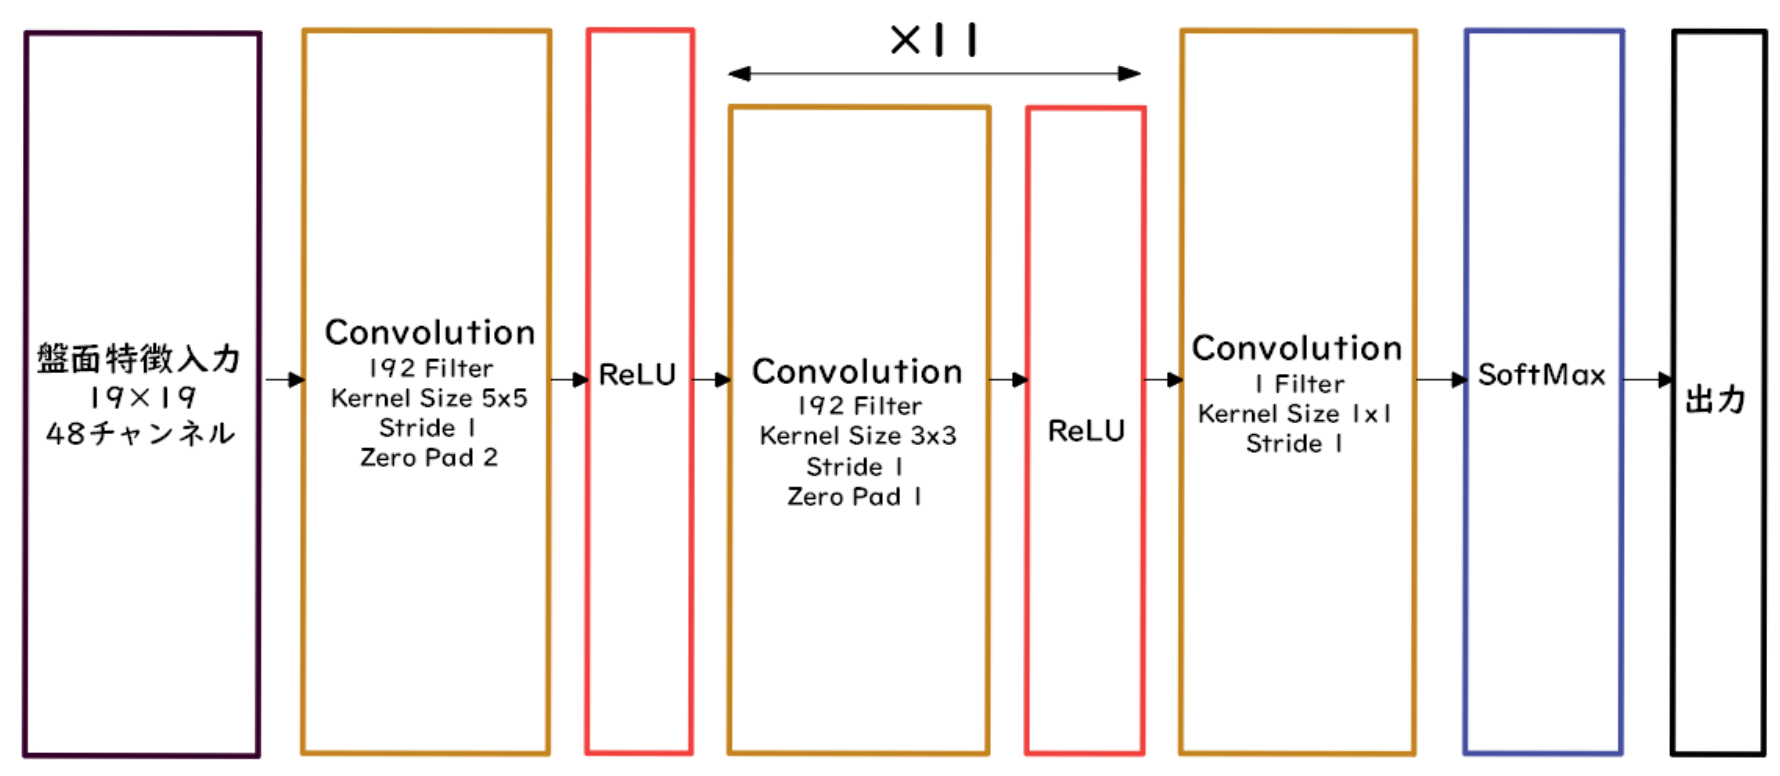
* どこに打つのが一番いいのかを確率(19×19の2次元データ)を出力するネットワーク
* 入力チャンネル...石、取られる石の数、着手履歴など必要な情報
* 畳み込みネットワーク
* 出力層にはsoftmax
___

### Alpha Go LeeのValueNet(価値関数)
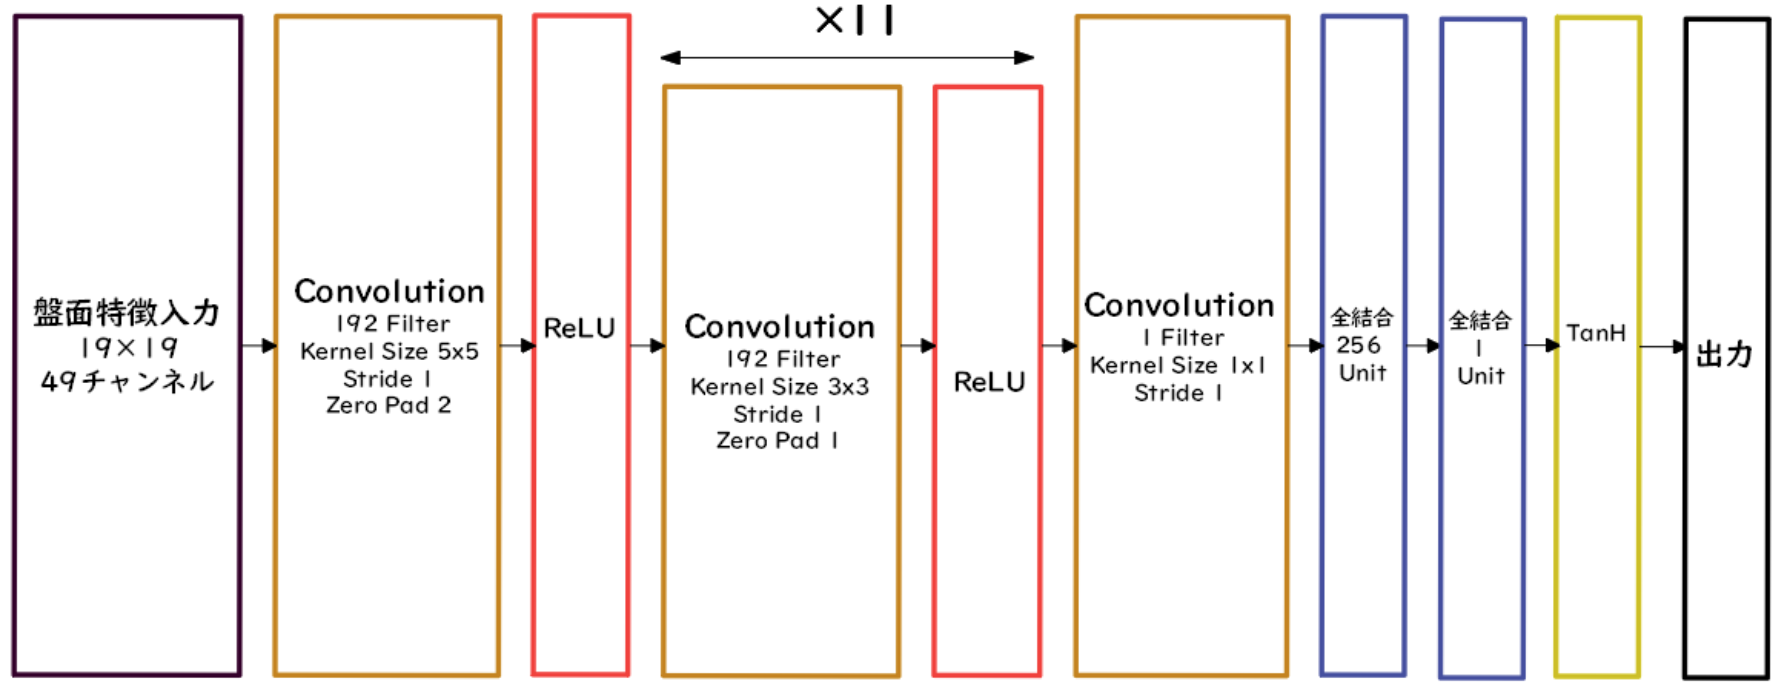
* 入力は1チャンネル多い(手番)
* 現局面の勝率を-1~1の範囲(1次元データ)で出力する
___

### RollOutPolicy
* NNではなく線形の方策関数
* 探索中に高速に着手確率を出すために使用される
___

### Alpha Go の学習
1. 教師あり学習によるRollOutPolicyとPolicyNetの学習
2. 強化学習によるPolicyNetの学習
3. 強化学習によるValueNetの学習
___

### 1.PolicyNetの教師あり学習
* KGS Go Server（ネット囲碁対局サイト）の棋譜データから3000万局面分の教師を用意し、教師と同じ着手を予測できるよう学習
* 教師が着手した手を1とし残りを0とした19×19次元の配列を教師とし、それを分類問題として学習
___

### 2.PolicyNetの強化学習
* 現状のPolicyNetとPolicyPoolからランダムに選択されたPolicyNetと対局シミュレーションを行い、その結果を用いて方策勾配法で学習
* PolicyPool...PolicyNetの強化学習の過程を500Iteraionごとに記録し保存しておいたもの
___

### 3.ValueNetの強化学習
* PolicyNetを使用して対局シミュレーションを行い、その結果の勝敗を教師として学習
* 教師データの作成方法は省略
___

### モンテカルロ木探索
* コンピュータ囲碁ソフトでは現在もっとも有効とされている探索法
* 勝敗のみを使って探索を行うことができないか、という発想で生まれた探索法
* 現局面から末端局面までPlayOutと呼ばれるランダムシミュレーションを多数回行い、その勝敗を集計して着手の優劣を決定する
* 該当手のシミュレーション回数が一定数を超えたら、その手を着手したあとの局面をシミュレーション開始局面とするよう、探索木を成長させる
___

### Alpha Go Zero(Leeとの違い)
* 教師あり学習を一切行わず、強化学習のみで作成
* 特徴入力からヒューリスティックな要素を排除し、石の配置のみにした
* PolicyNetとValueNetを１つのネットワークに統合した
* Residual Netを導入した
* モンテカルロ木探索からRollOutシミュレーションをなくした
___

### ResidualNetwork
* ネットワークにショートカット構造を追加して、勾配の爆発、消失を抑える効果を狙ったもの
* 100層を超えるネットワークでの安定した学習が可能となった
___

### Alpha Go Zeroの学習法
* **自己対局による教師データの作成**...現状のネットワークでモンテカルロ木探索を用いて自己対局を行う。教師データの形は(局面、着手選択確率分布、勝敗)が１セット
* **学習**...自己対局で作成した教師データを使い学習を行う。NetworkのPolicy部分の教師に着手選択確率分布を用い、Value部分の教師に勝敗を用いる
* **ネットワークの更新**...学習後、現状のネットワークと学習後のネットワークとで対局テストを行い、学習後のネットワークの勝率が高かった場合、学習後のネットワークを現状のネットワークとする
___

# 軽量化・高速化技術

### 分散深層学習とは
* 深層学習は多くのデータを使用したり、パラメータ調整のために多くの時間を使用したりするため、高速な計算が求められる
* 複数の計算資源(ワーカー)を使用し、並列的にニューラルネットを構成することで、効率の良い学習を行いたい
* データ並列化、モデル並列化、GPUによる高速技術は不可欠である
___

### データ並列化
* 親モデルを各ワーカーに子モデルとしてコピー
* データを分割し、各ワーカーごとに計算させる
___

### 同期型と非同期型の比較
* 同期形...各ワーカーが計算が終わるのを待ち、全ワーカーの勾配が出たところで勾配の平均を計算し、親モデルのパラメータを更新する
* 非同期形...各ワーカーはお互いの計算を待たず、各子モデルごとに更新を行う。学習が終わった子モデルはパラメータサーバにPushされる。新たに学習を始める時は、パラメータサーバからPopしたモデルに対して学習していく
* 処理のスピードは、お互いのワーカーの計算を待たない非同期型の方が早い
* 非同期型は最新のモデルのパラメータを利用できないので、学習が不安定になりやすい
___

### モデル並列化
* 親モデルを各ワーカーに分割し、それぞれのモデルを学習させる。全てのデータで学習が終わった後で、一つのモデルに復元
* モデルのパラメータ数が多いほど、スピードアップの効率も向上する
* モデルが大きい時はモデル並列化を、データが大きい時はデータ並列化をすると良い
___

### GPUによる高速化
* GPGPU(General-purpose on GPU)...元々の使用目的であるグラフィック以外の用途で使用されるGPUの総称
* CPU...高性能なコアが少数、複雑で連続的な処理が得意
* GPU...比較的低性能なコアが多数、簡単な並列処理が得意、ニューラルネットの学習は単純な行列演算が多いので、高速化が可能
___

### GPGPU開発環境
* CUDA ...GPU上で並列コンピューティングを行うためのプラットフォーム、NVIDIA社が開発しているGPUのみで使用可能。Deep Learning用に提供されているので、使いやすい
* OpenCL...オープンな並列コンピューティングのプラットフォーム。NVIDIA社以外の会社(Intel, AMD, ARMなど)のGPUからでも使用可能。Deep Learning用の計算に特化しているわけではない
___

### モデルの軽量化の利用
* モデルの軽量化はモバイル, IoT 機器において有用な手法
* 計算の高速化と省メモリ化を行うためモバイル,IoT 機器と相性が良い手法
* 手法として、**量子化**、**蒸留**、**プルーニング**があげられる
___

### 量子化(Quantization)とは
* 通常のパラメータの64 bit 浮動小数点を32 bit など下位の精度に落とすことでメモリと演算処理の削減を行う
___

### 量子化の利点と欠点
* 利点...計算の高速化,省メモリ化
* 欠点...精度の低下(ニューロンが表現できる少数の有効桁が小さくなるため)
* 量子化する際は極端に精度が落ちない程度に量子化をしなければならない
___

### 蒸留(Distillation)とは
* 規模の大きなモデルの知識を使い、軽量なモデルの作成を行う
* 学習済みの精度の高いモデルの知識を軽量なモデルへ継承させる
___

### 教師モデルと生徒モデル
* 蒸留は教師モデルと生徒モデルの2つで構成される
* 教師モデルの重みを固定し生徒モデルの重みを更新していく
* 教師モデルと生徒モデルのそれぞれの誤差を使い重みを更新していく
___

### プルーニング(Pruning)とは
* モデルの精度に寄与が少ないニューロンを削減することで、モデルの軽量化、高速化が見込まれる
* 重みが閾値以下の場合ニューロンを削減し、再学習を行う
* 閾値を高くすると大きく削減できるが、精度も減少する
___

### モデルの軽量化まとめ
* **量子化**...重みの精度を下げることにより計算の高速化と省メモリ化を行う技術
* **蒸留**...複雑で精度の良い教師モデルから軽量な生徒モデルを効率よく学習を行う技術
* **プルーニング**..寄与の少ないニューロンをモデルから削減し高速化と省メモリ化を行う技術
___

# 応用モデル

### MobileNet
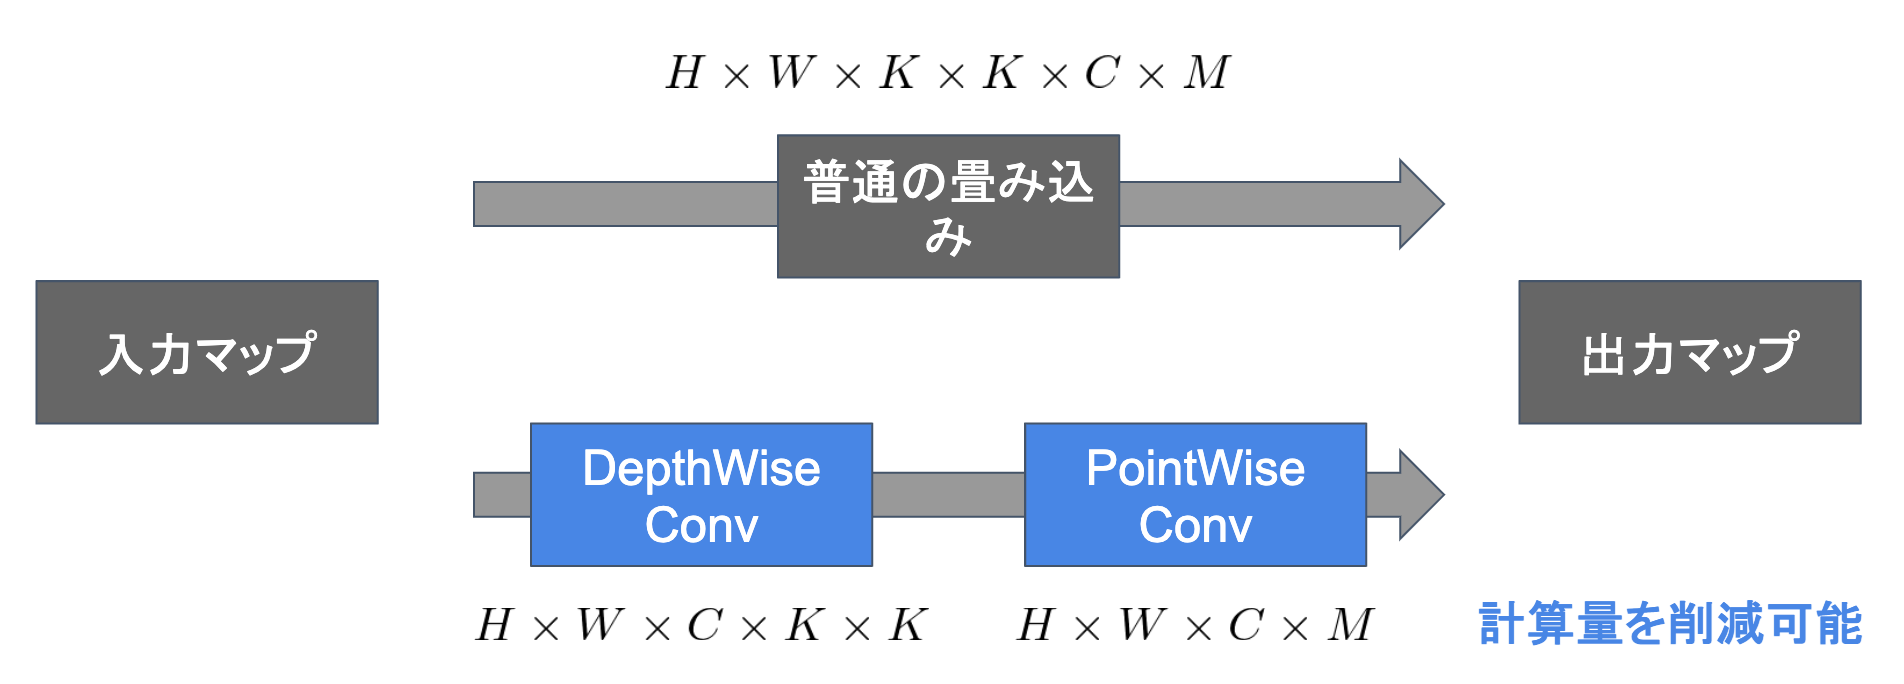
* ディープラーニングモデルの軽量化・高速化・高精度化を実現
* 近年の画像認識タスクに用いられる最新のニューラルネットワークアーキテクチャは、多くのモバイルおよび組み込みアプリケーションの実行環境を上回る高い計算資源を必要とされる
___

### 一般的な畳み込みレイヤー
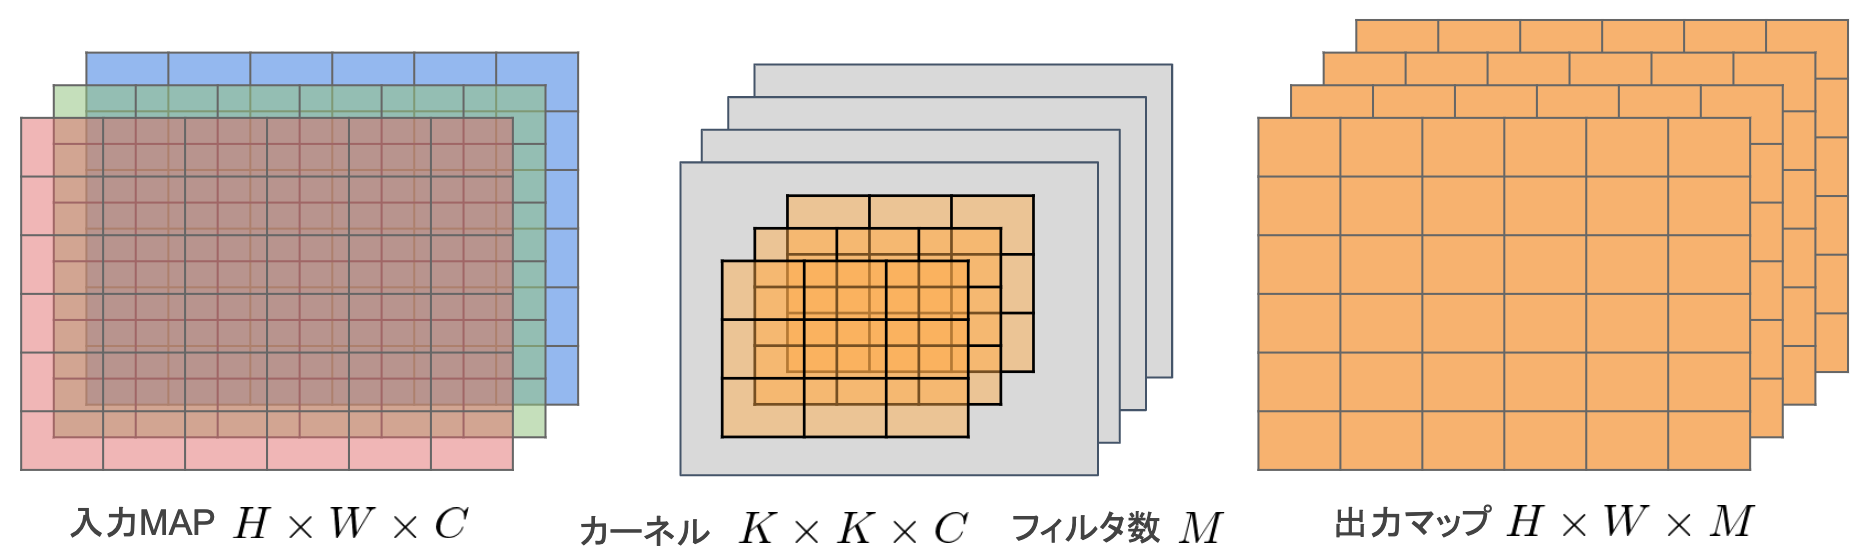
* 入力特徴マップ(チャネル数)...$H\times W\times C$
* 畳込みカーネルのサイズ...$K\times K\times C$
* 出力マップ...$H\times W\times M$($M$はフィルタ数)
___

### 一般的な畳み込みレイヤーは計算量が多い
* 上図で、ストライド１でパディングを適用した場合の畳み込み計算の計算量...$H\times W\times K\times K\times C\times M$
* MobileNetsは**Depthwise Convolution**と**Pointwise Convolution**の組み合わせで軽量化を実現
___

### Depthwise Convolution
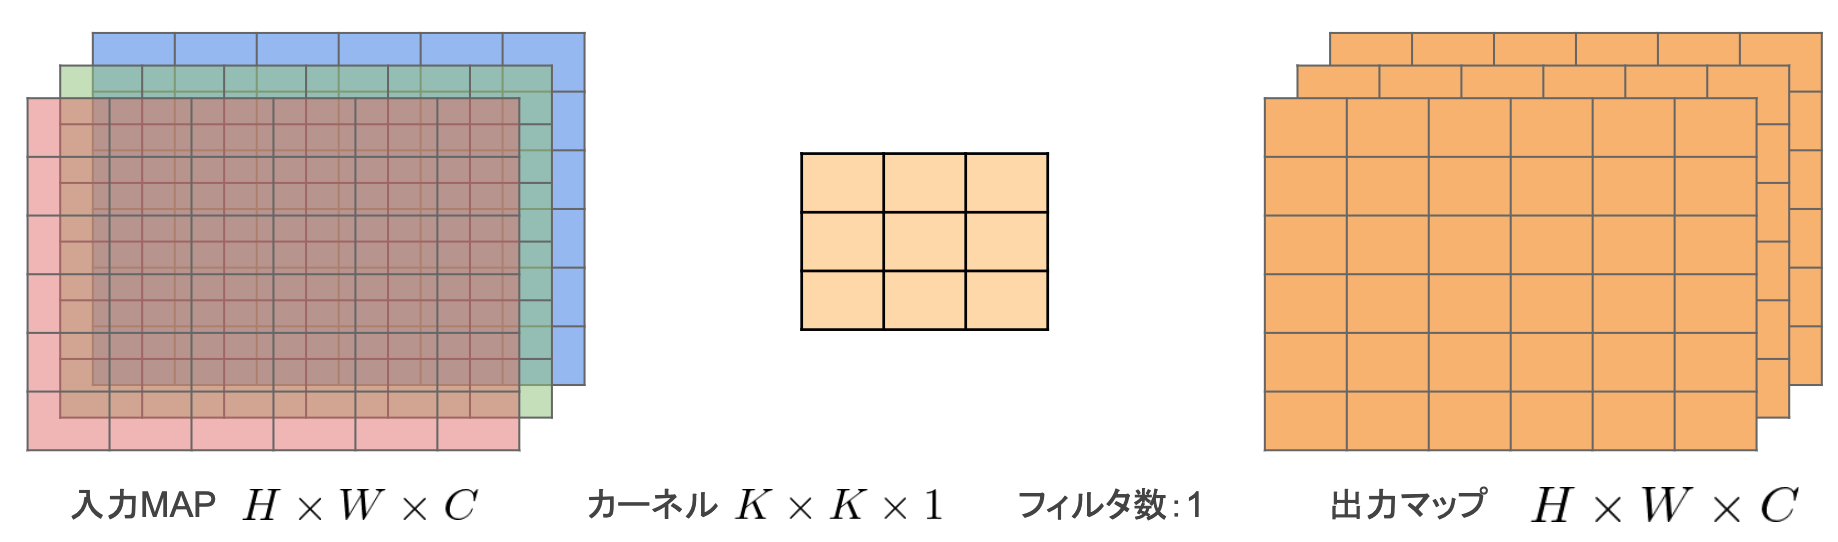
* 入力マップのチャネルごとに畳み込みを実施
* 出力マップをそれらと結合(入力マップのチャネル数と同じになる)
* 各層ごとの畳み込みなので層間の関係性は全く考慮されない
* 出力マップの計算量...$H\times W\times K\times K\times C$
___

### Pointwise Convolution
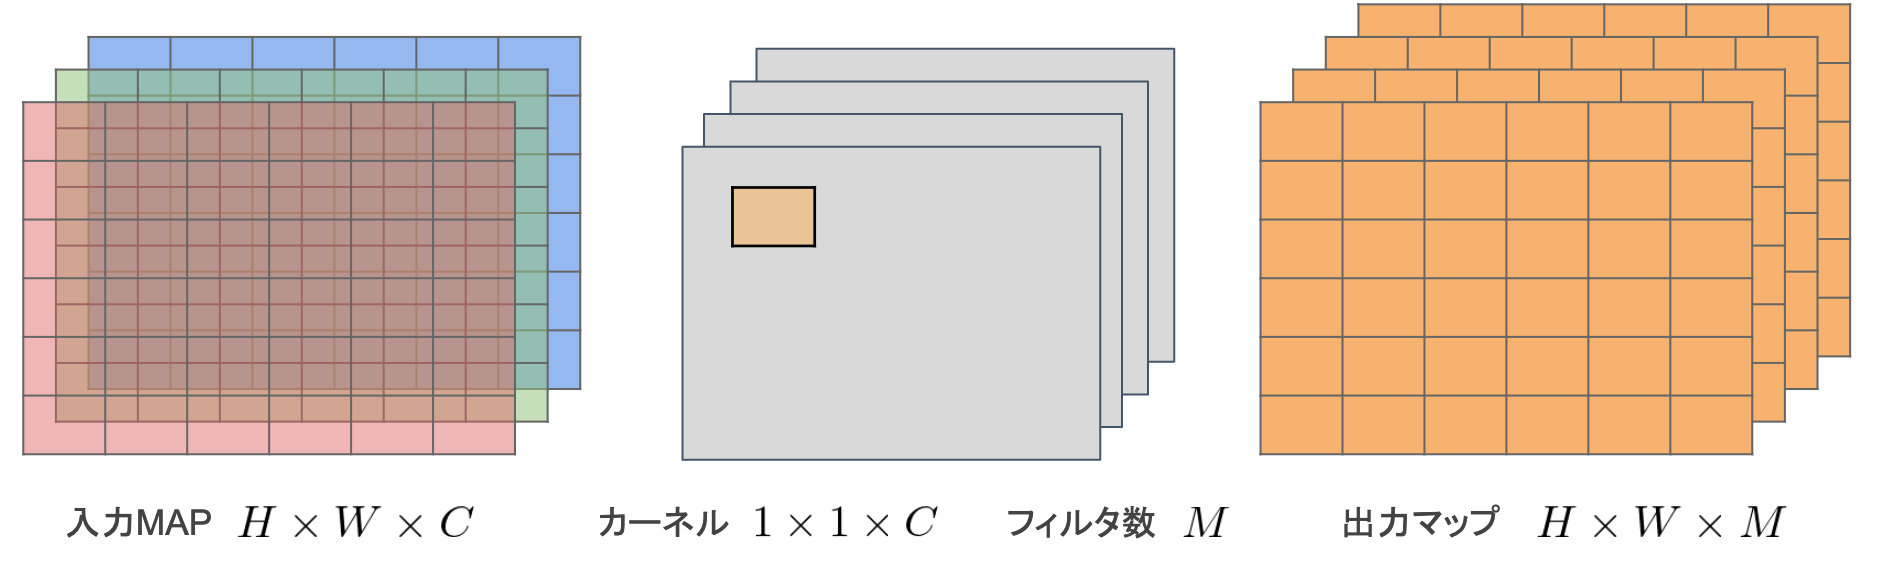
* 1 x 1 convとも呼ばれる
* 入力マップのポイントごとに畳み込みを実施
* 出力マップ(チャネル数)はフィルタ数分だけ作成可能(任意のサイズが指定可能)
* 出力マップの計算量...$H\times W\times C\times M$
___

### DenseNet
* CNNアーキテクチャの一種
* DenseBlockと呼ばれるモジュールを用いている
___

### DenseNet2
* 出力層に前の層の入力を足しあわせる。層間の情報の伝達を最大にするために全ての同特徴量サイズの層を結合する
* 特徴マップの入力に対し、下記の処理で出力を計算
    * Batch正規化
    * Relu関数による変換
    * 3 x 3畳み込み層による処理
* 前スライドで計算した出力に入力特徴マップを足し合わせる(入力特徴マップのチャンネル数がl x kだった場合、出力は(l+1) x kとなる)
* kをネットワークのgrowth rate(成長率)と呼ぶ
___

### Transition Layer
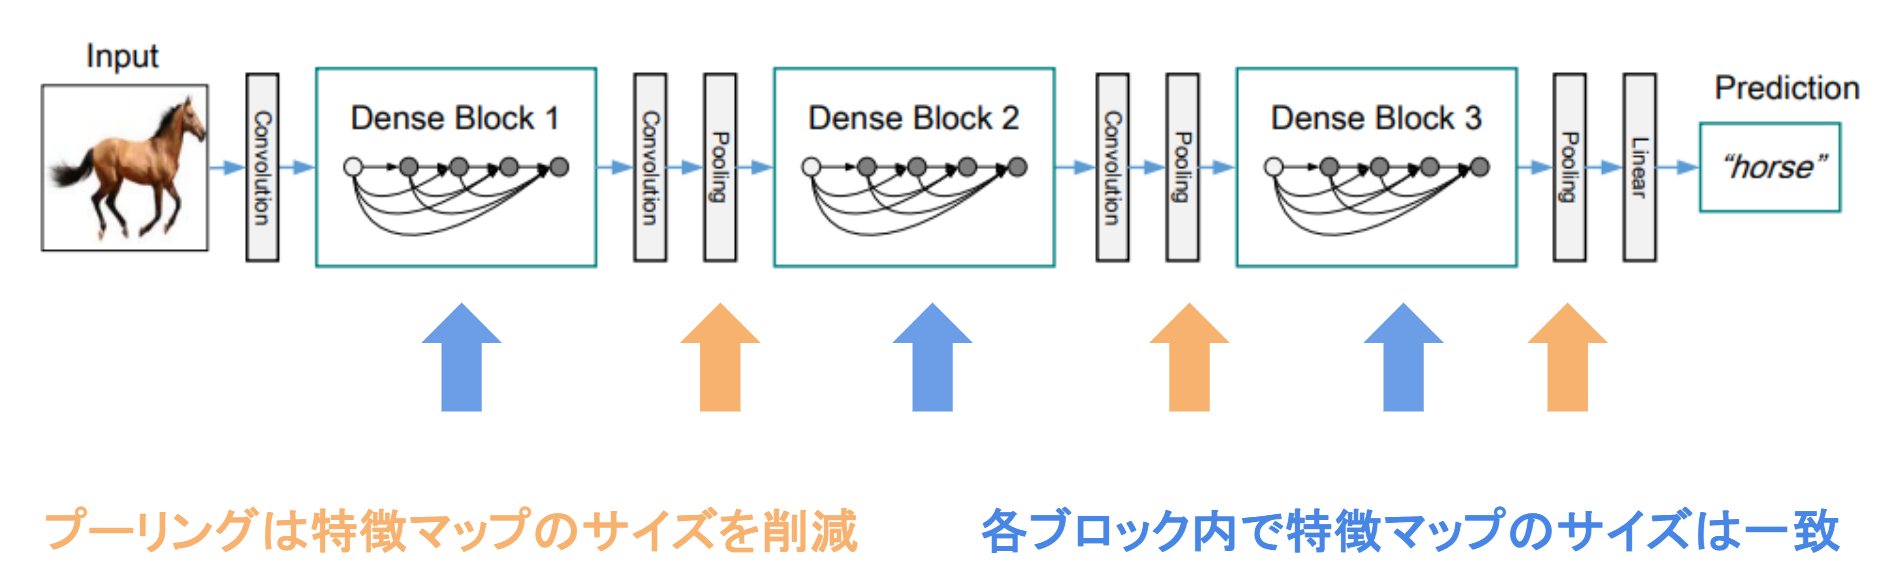
* CNNでは中間層でチャネルサイズを変更
* 特徴マップのサイズを変更し、ダウンサンプリングを行うため、Transition Layerと呼ばれる層でDence blockをつなぐ
___

### DenseNetとResNetの違い
* DenseBlock...前方の各層からの出力全てが後方の層への入力として用いられる
* RessidualBlock...前1層の入力のみ後方の層へ入力として用いられる
___

### Batch Norm Layer
* レイヤー間を流れるデータの分布を、ミニバッチ単位で平均が0・分散が1になるように正規化
* 学習時間の短縮や初期値への依存低減、過学習の抑制など効果がある
* 問題点...Batch Sizeが小さい条件下では、学習が収束しないことがある
___

### Batch Norm以外の正規化
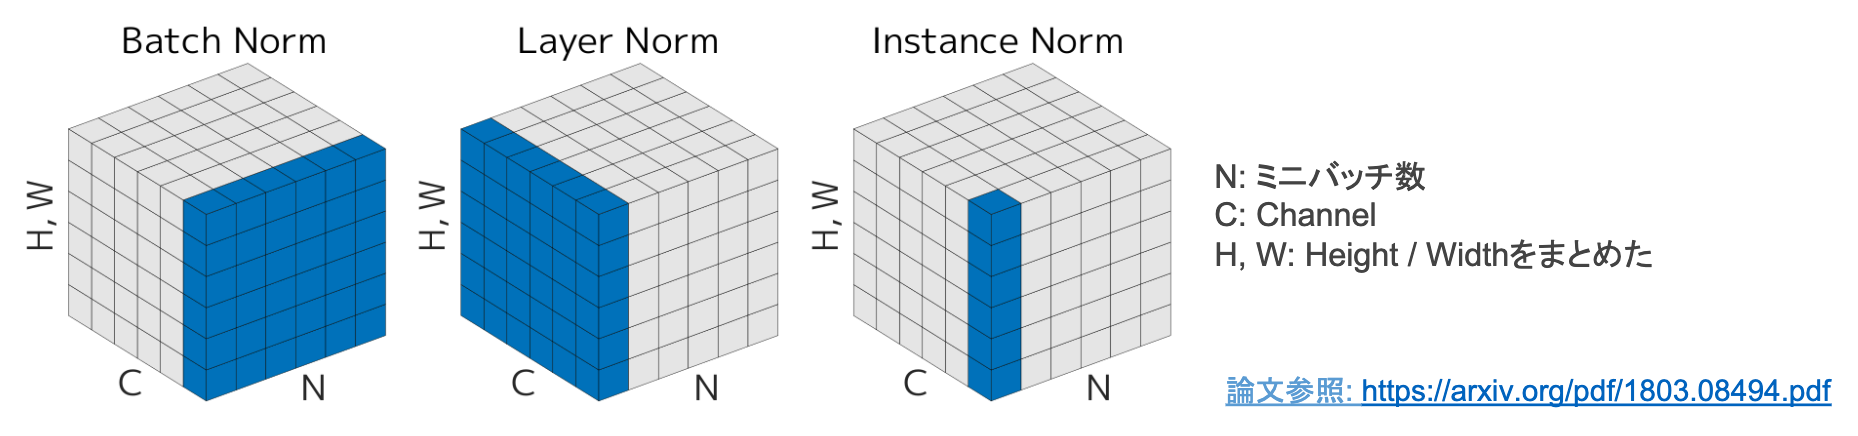
* Batch Norm...ミニバッチに含まれるsampleの同一チャネルが同一分布に従うよう正規化
* **Layer Norm**...それぞれのsampleの全てのpixelsが同一分布に従うよう正規化
* **Instance Nrom**...さらにchannelも同一分布に従うよう正規化
___

### Wavenet
* 生の音声波形を生成するする深層学習モデル
* PixelCNNを音声に応用したもの
___

### Wavenetのメインアイデア
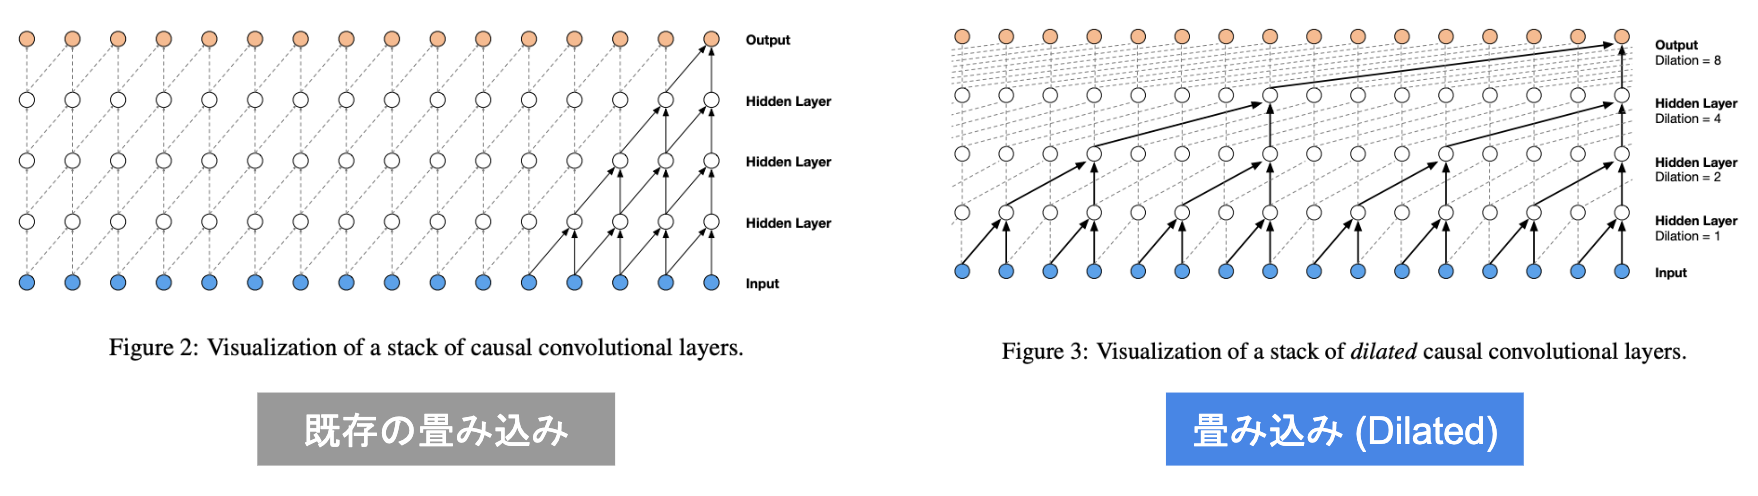
* 時系列データに対して畳込みを適用する
* Dilated convolution...層が深くなるにつれて、畳み込むリンクを離す
* パラメータ数に対する受容野が広い
___

# Transformer

### Seq2Seq
* 系列(Sequence)を入力として、系列を出力するもの
* Encoder-Decoderモデルとも呼ばれる
* 入力系列がEncode(内部状態に変換)され、内部状態からDecode(系列に変換)する
* 要は言語モデルをふたつ連結した形になっている
___

### RNN x 言語モデル
* RNNは系列情報を内部状態に変換することができる
* 文章の各単語が現れる際の同時確率は、事後確率で分解できる
* 各地点で次にどの単語が来れば自然(事後確率最大)かを出力できる
* 言語モデルを再現するようにRNNの重みが学習されていれば、ある時点の次の単語を予測することができる
___

### Attention (注意機構)
* 翻訳先の各単語を選択する際に、翻訳元の文中の各単語の隠れ状態を利用
* Attentionは辞書オブジェクト
* query(検索クエリ)に一致するkeyを索引し、対応するvalueを取り出す操作であると見做すことができる
___

### Transformer
* RNNを使わない。必要なのはAttentionだけ 
* 当時のSOTAをはるかに少ない計算量で実現
___

### Transformer主要モジュール
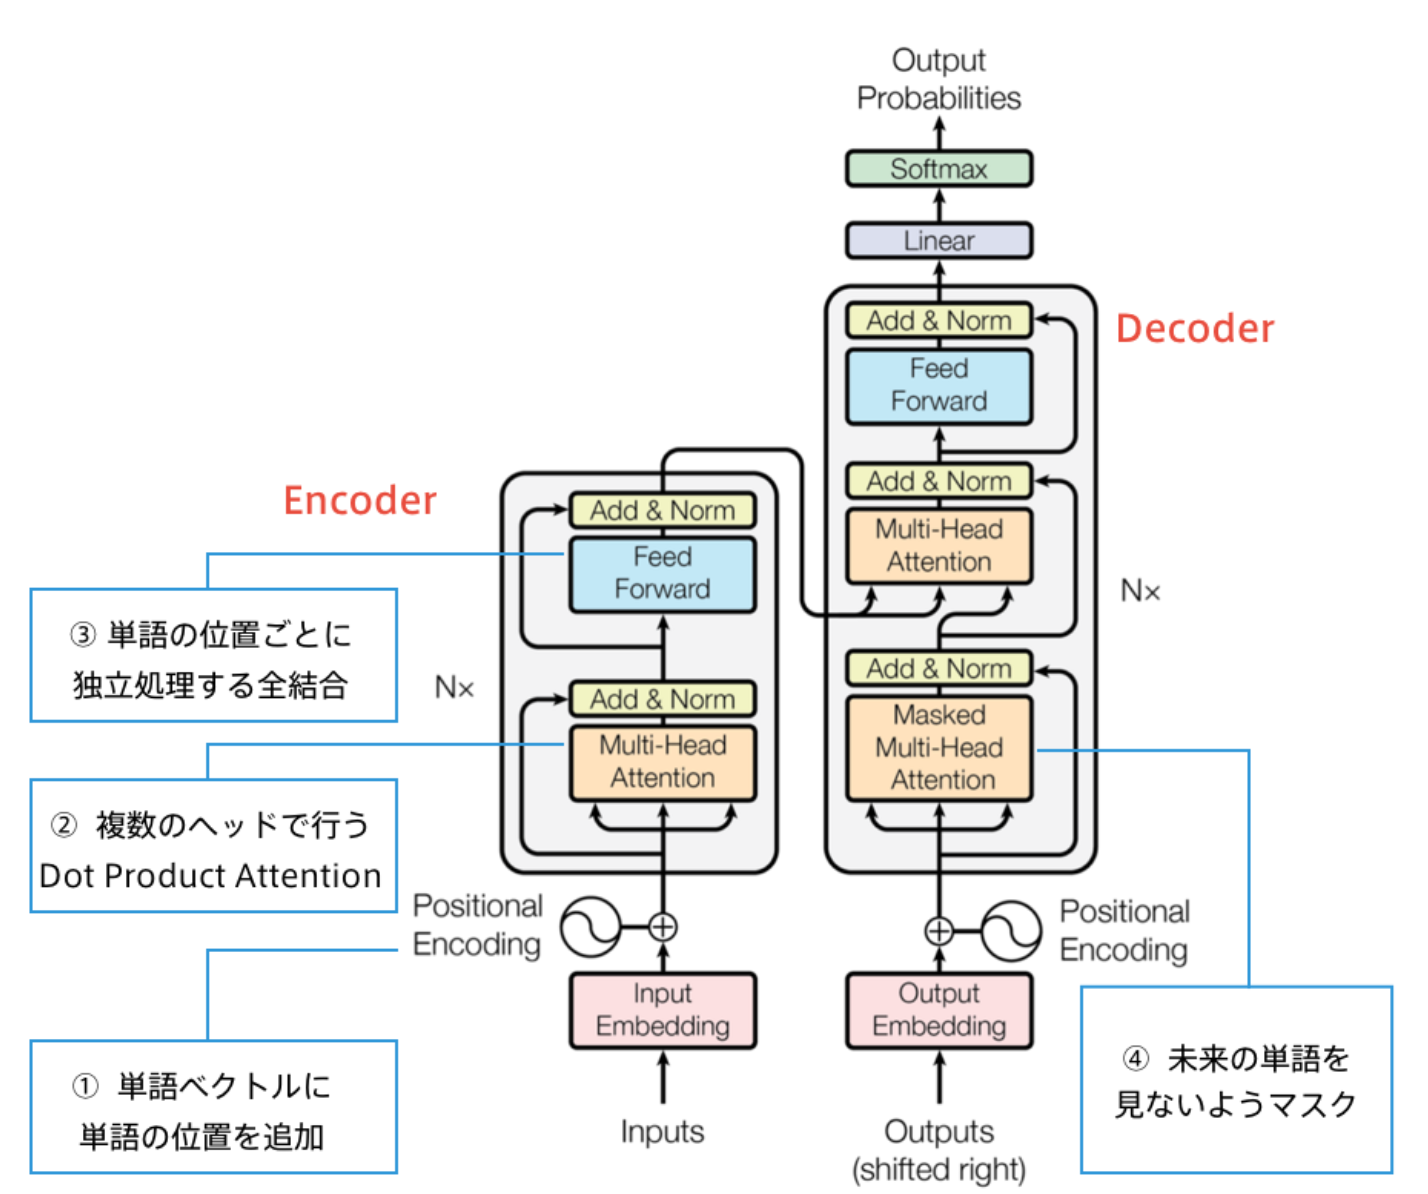
___

### 注意機構には二種類ある
* ソース・ターゲット注意機構...情報が来る場所と、情報が狙う場所に分かれている
* 自己注意機構...どこに注目するかを自分の入力の中で判断する
___

### Transformer-Encoder
* 自己注意機構により文脈を考慮して各単語をエンコード
* 入力を全て同じにして学習的に注意箇所を決めていく
___

### Position-Wise Feed-Forward Networks
* 位置情報を保持したまま順伝播させる
* 各Attention層の出力を決定
___

### Scaled dot product attention
* 全単語に関するAttentionをまとめて計算する
___

### Multi-Head attention
* 重みパラメタの異なる８個のヘッドを使用
* ８個のScaled Dot-Product Attentionの出力をConcat
* それぞれのヘッドが異なる種類の情報を収集
___

### Decoder
* Encoderと同じく6層 
    * 各層で二種類の注意機構 
    * 注意機構の仕組みはEncoderとほぼ同じ
* 自己注意機構 
    * 生成単語列の情報を収集 
    * 直下の層の出力へのアテンション
    * 未来の情報を見ないようにマスク 
* Encoder-Decoder attention 
    * 入力文の情報を収集 
    * Encoderの出力へのアテンション
___

### Add & Norm
* Add(Residual Connection) 
    * 入出力の差分を学習させる 
    * 実装上は出力に入力をそのまま加算するだけ 
    * 効果：学習・テストエラーの低減 
* Norm (Layer Normalization) 
    * 各層においてバイアスを除く活性化関数への入力を平均０、分散１に正則化 
    * 効果：学習の高速化
___

### Position Encoding
* RNNを用いないので単語列の語順情報を追加する必要がある
* 単語の位置情報をエンコード
___

### ハンズオン
* 参考...https://www.anarchive-beta.com/entry/2021/03/29/150000

In [1]:
import numpy as np

* 必要なライブラリのインポート

In [8]:
class AttentionSeq2seq:    
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        
        self.encoder = AttentionEncoder(V, D, H)
        self.decoder = AttentionDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()
        
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

* Attention付きseq2seqの実装
* 初期化メソッド
* 変数の形状に関する値を取得
* 各レイヤのインスタンスを作成(ここでは省略)
* パラメータと勾配をリストに格納

In [5]:
    def forward(self, xs, ts):
        decoder_xs = ts[:, :-1]
        decoder_ts = ts[:, 1:]  
        
        hs = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, hs)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

* 順伝播メソッド
* Decoder用の入植データを作成
* 各レイヤの順伝播を計算

In [6]:
    def backward(self, dout=1):
        dout = self.softmax.backward(dout) 
        dhs = self.decoder.backward(dout) 
        dout = self.encoder.backward(dhs) 
        return dout

* 逆伝播メソッド
* 各レイヤの逆伝播を逆順に計算

In [7]:
    def generate(self, xs, start_id, sample_size):
        hs = self.encoder.forward(xs)
        
        sampled = self.decoder.generate(hs, start_id, sample_size)
        return sampled

* 文章生成メソッド
* 問題文をエンコード
* 解答を生成
___

# 物体検知・セグメンテーション

### 鳥瞰図：広義の物体認識タスク
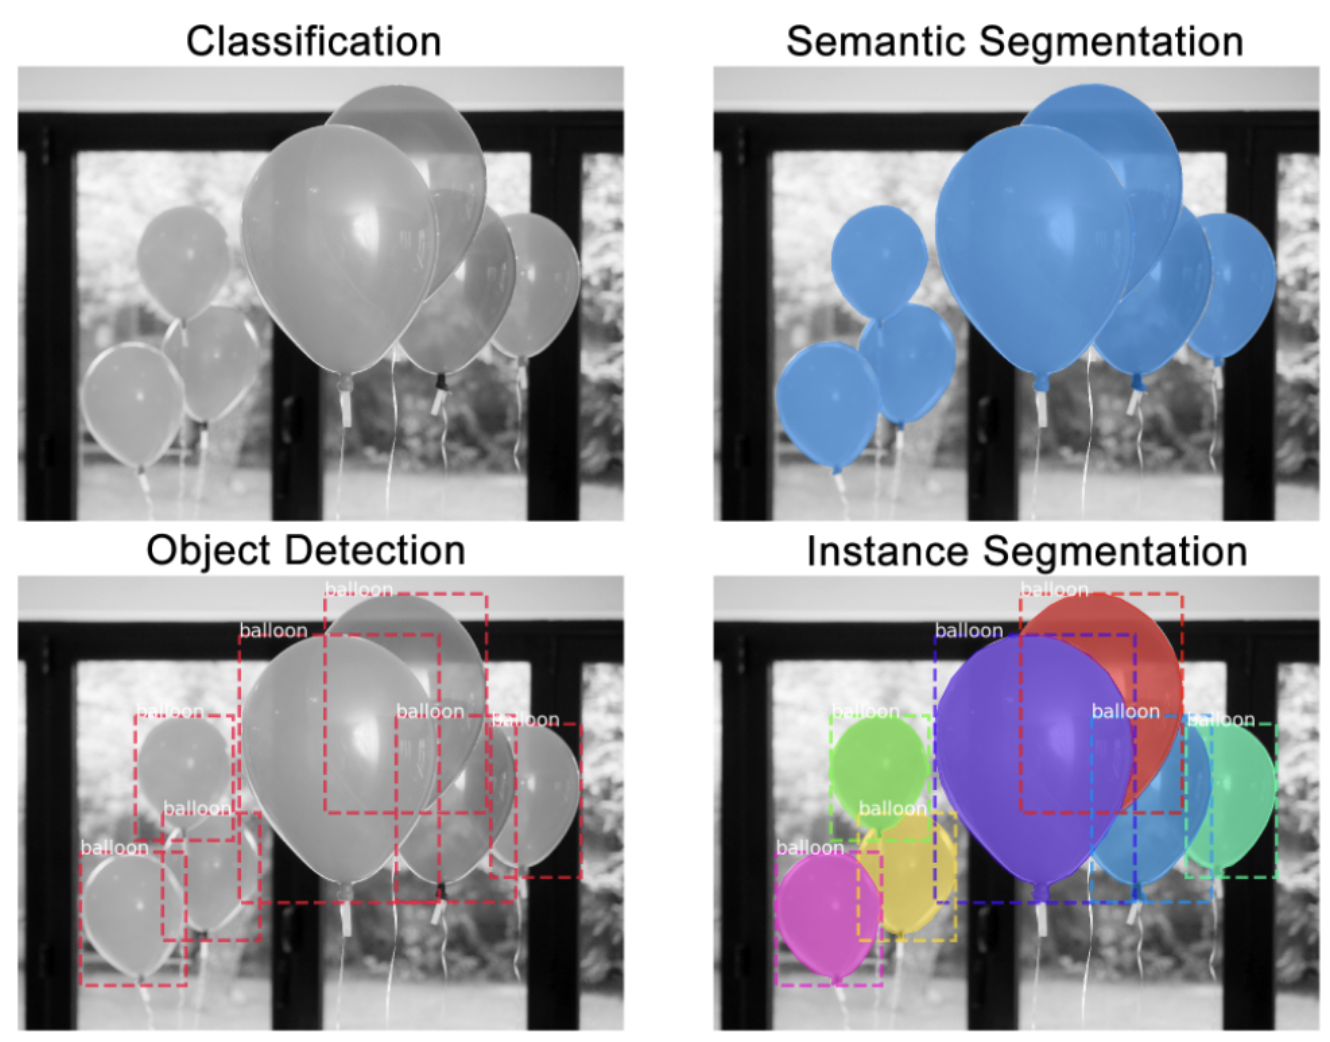
* 分類(Classification)...(画像に対し単一または複数の)クラスラベル
* 物体検知(Object Deteciton)...Bounding Box
* 意味領域分割(Semantic Segmentation)...(各ピクセルに対し単一の)クラスラベル
* 個体領域分割(Instance Segmentation)...(各ピクセルに対し単一の)クラスラベル
___

### 代表的データセット
* VOC12
    * クラス...20
    * データ数...11540
    * Box/画像...2.4
    * 物体毎のラベル...有
* VOC12
    * クラス...200
    * データ数...476668
    * Box/画像...1.1
    * 物体毎のラベル...無
* VOC12
    * クラス...80
    * データ数...123287
    * Box/画像...7.3
    * 物体毎のラベル...有
* VOC12
    * クラス...500
    * データ数...1743042
    * Box/画像...7.0
    * 物体毎のラベル...有
___

### IoU：Intersection over Union
$$Iou=\frac{TP}{TP+FP+FN}$$
* 物体検出においてはクラスラベルだけでなく, 物体位置の予測精度も評価したい
* 別名Jaccard係数とも呼ばれる
___

### AP(Average Precision)
$$ AP = \int_{0}^{1} P(R)dR $$
* PR曲線の下面積
___

### mAP：mean Average Precision
$$ mAP = \frac{1}{C} \sum_{i=1}^{C} AP_{i} $$
* APの平均値
___

### マイルストーン：深層学習以降の物体検知
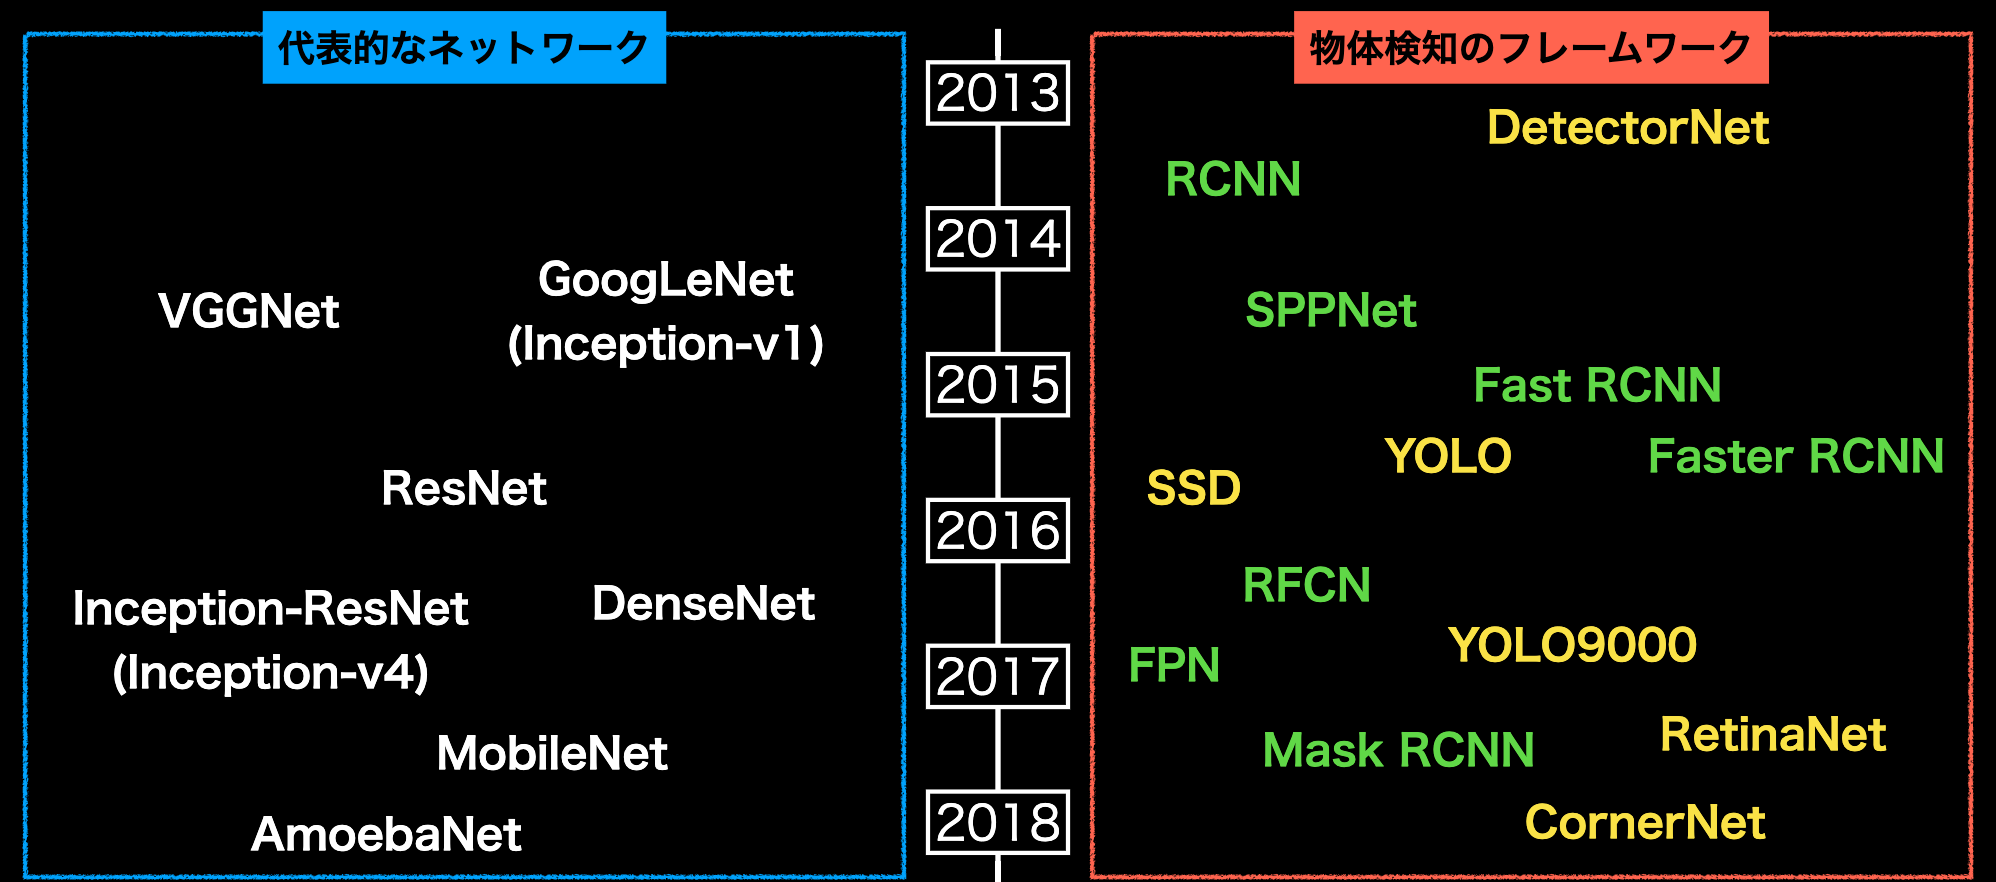
* AlexNetの登場を皮切りに, 時代はSIFTからDCNNへ
___

### 物体検知のフレームワーク
* 2段階検出器(緑)...候補領域の検出とクラス推定を別々に行う。精度が高いが、計算量が多い
* 1段階検出器(黄)...候補領域の検出とクラス推定を同時に行う。精度が低いが、計算量が少ない
___

### SSD
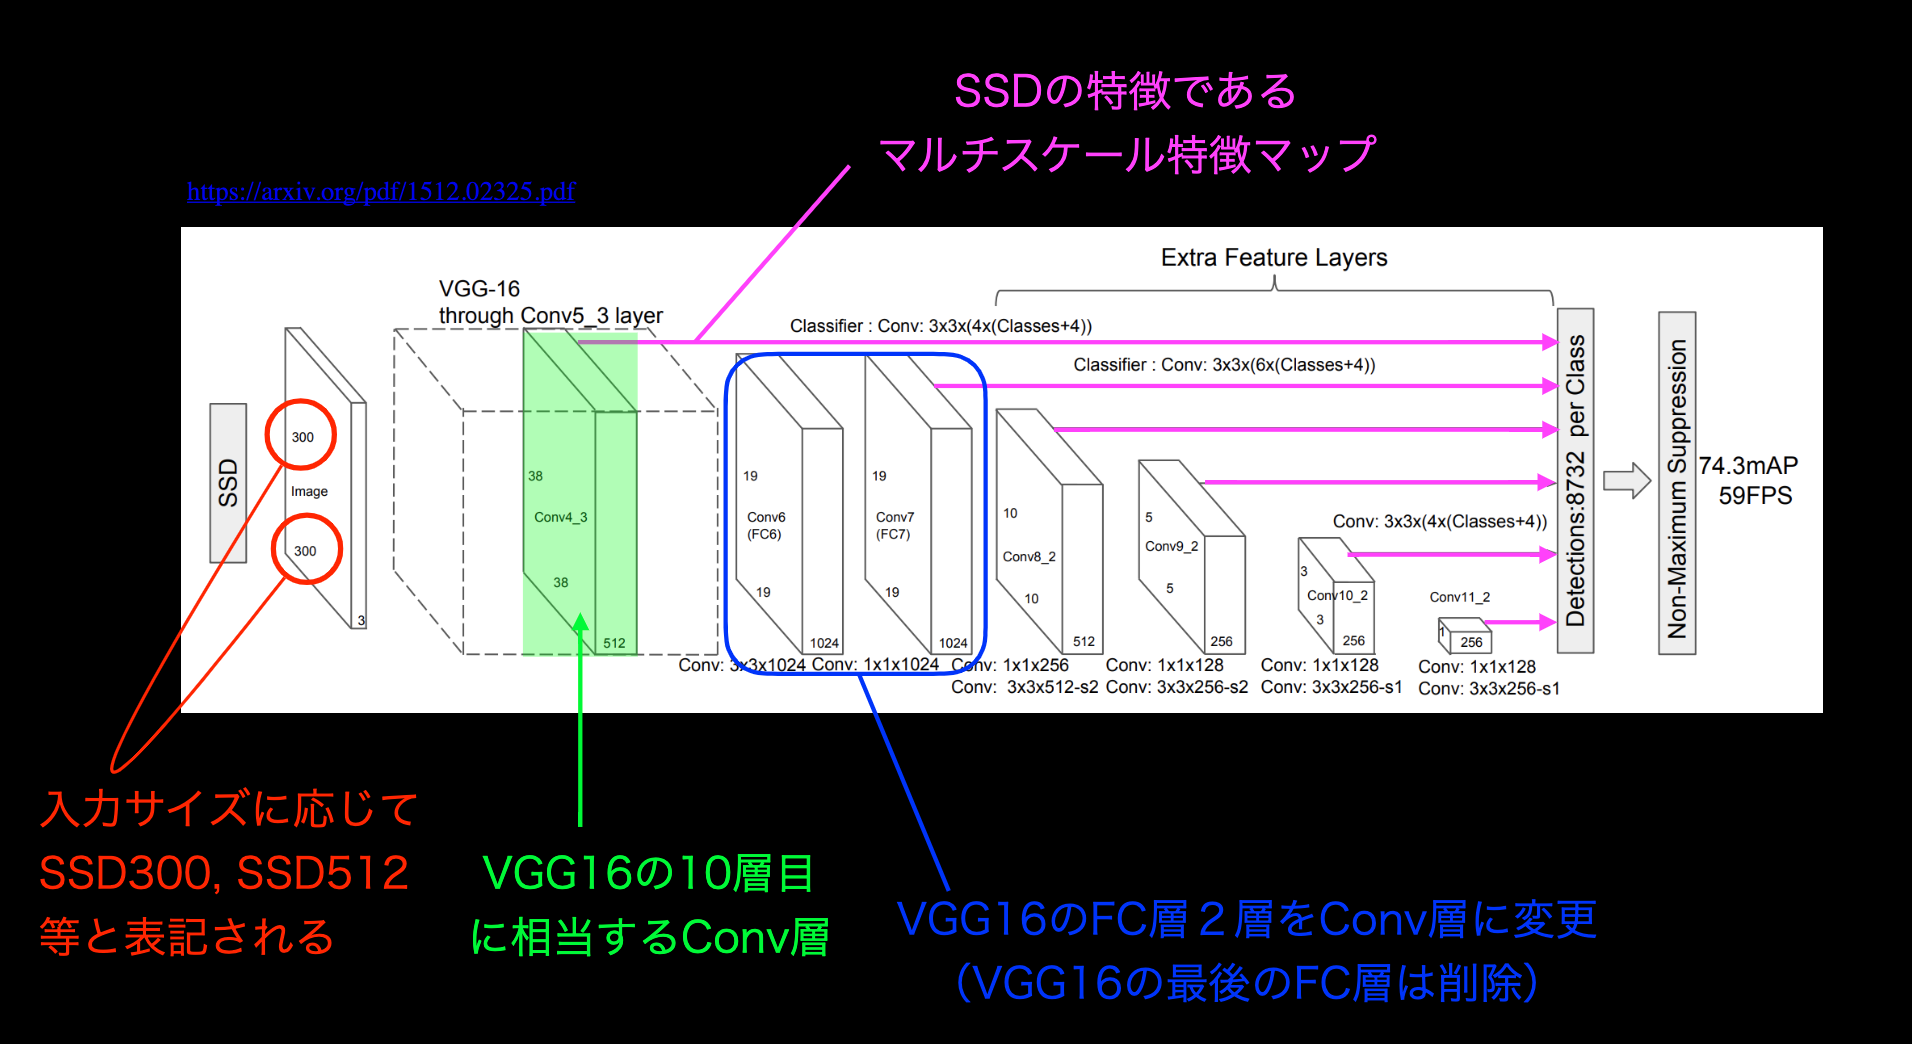
* Default BOXを用意
* Default BOXを変形し, conf.を出力
___

### その他の工夫
* 多数のDefault Boxを用意したことで生ずる問題への対処
* Non-Maximum Suppression...IoUを計算して最も大きいものだけを利用する
* Hard Negative Mining...Positive(非背景):Negative(背景)が少なくとも1:3になるよう制限
___

### FCN(Fully Convolutional Network)
* ピクセル単位で物体の領域を特定する技術の１つ
* CNNの全結合層をアップサンプリングした畳み込み層に置き換えたネットワーク
* 入力画像の各画素のラベル(物体種別)を推定することができる
___

### Deconvolution/Transposed convolution
* 通常のConv層と同様、カーネルサイズ、パディング、ストライドを指定
* 処理手順
    1. 特徴マップのpixel間隔をstrideだけ空ける
    2. 特徴マップのまわりに(kernel size - 1) - paddingだけ余白を作る
    2. 畳み込み演算を行う
___

### U-Net
* アルファベットの「U」のような形をしていることから、U-Netと名付けられた
* エンコーダとデコーダから成るモデル
___

### ハンズオン
* 参考...https://qiita.com/DeepTama/items/08e9b0f9d289aaf279fe
* KerasのSSDがどのように実装されているかを見てみる

In [11]:
def get_output_shape_for(self, input_shape):
    num_priors_ = len(self.aspect_ratios)
    layer_width = input_shape[self.waxis]
    layer_height = input_shape[self.haxis]
    num_boxes = num_priors_color * layer_width * layer_height
    return (input_shape[0], num_boxes, 8)

* 検出クラスの定義

In [ ]:
decode_bbox = self.decode_boxes(mbox_loc[i],mbox_priorbox[i], variances[i])

* 予測結果から物体を検出するソースを確認
* 矩形処理を行うdecode_boxes()を呼び出す

In [ ]:
prior_width = mbox_priorbox[:, 2] - mbox_priorbox[:, 0]
prior_height = mbox_priorbox[:, 3] - mbox_priorbox[:, 1]
prior_center_x = 0.5 * (mbox_priorbox[:, 2] + mbox_priorbox[:, 0])
prior_center_y = 0.5 * (mbox_priorbox[:, 3] + mbox_priorbox[:, 1])

* priorboxの情報から各BBOXの中心位置、幅、高さを算出

In [ ]:
decode_bbox_center_x = mbox_loc[:, 0] * prior_width * variances[:, 0]
decode_bbox_center_x += prior_center_x
decode_bbox_center_y = mbox_loc[:, 1] * prior_width * variances[:, 1]
decode_bbox_center_y += prior_center_y
decode_bbox_width = np.exp(mbox_loc[:, 2] * variances[:, 2])
decode_bbox_width *= prior_width
decode_bbox_height = np.exp(mbox_loc[:, 3] * variances[:, 3])
decode_bbox_height *= prior_height

* 検出したバウンデックスボックスのオフセット値とVariance値から矩形情報（中心位置、幅、高さ）の計算

In [ ]:
decode_bbox_xmin = decode_bbox_center_x - 0.5 * decode_bbox_width
decode_bbox_ymin = decode_bbox_center_y - 0.5 * decode_bbox_height
decode_bbox_xmax = decode_bbox_center_x + 0.5 * decode_bbox_width
decode_bbox_ymax = decode_bbox_center_y + 0.5 * decode_bbox_height

* 計算結果から矩形の左上、右下の座標を計算

In [ ]:
if c == background_label_id:
    continue
c_confs = mbox_conf[i, :, c]
c_confs_m = c_confs > confidence_threshold

* クラスconfの処理
* 予測したクラスのスコア値(conf)を用いて、最終的に使う矩形を選択する
____